<a href="https://colab.research.google.com/github/SianC7/LAIDS/blob/main/Quant_AE_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load in Best PCA and CNN models

In [56]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

# --- Load AE model ---
ae_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Honours Project/Sian\'s Models/AE-MLP files/Best_AE.keras')
ae_model_name_prefix = '/content/drive/MyDrive/Colab Notebooks/Honours Project/Sian\'s Models/AE-MLP files/AE'

# --- Load in per feature thresholds ---
per_feature_thresholds_path = "/content/drive/MyDrive/Colab Notebooks/Honours Project/Sian's Models/AE-MLP files/ae_per_feature_thresholds.npy"
per_feature_thresholds = np.load(per_feature_thresholds_path)

# --- MLP model ---
mlp_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Honours Project/Sian\'s Models/AE-MLP files/Best_MLP.keras')
mlp_model_name_prefix = '/content/drive/MyDrive/Colab Notebooks/Honours Project/Sian\'s Models/AE-MLP files/MLP'

Generate Model graphs

In [57]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Create a PNG image of the model architecture
plot_model(ae_model, to_file="ae_model_graph.png", show_shapes=True, show_layer_names=True)

# Print summary in console (text-based)
ae_model.summary()

# Create a PNG image of the model architecture
plot_model(mlp_model, to_file="classifer_model_graph.png", show_shapes=True, show_layer_names=True)

mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 52)             │         3,380 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,178 (145.23 KB)

 Trainable params: 12,392 (48.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,786 (96.82 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,111 (66.84 KB)

 Trainable params: 5,703 (22.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,408 (44.57 KB)

Get Training and test data

In [58]:
import pandas as pd
import os
import numpy as np

# --- Data Collection ---

# Set pandas display options for wide output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

save_path = "/content/drive/MyDrive/Colab Notebooks/Honours Project/Sian's Models/AE-MLP files"

# Training sets
X_train = pd.read_csv(os.path.join(save_path, "AE_X_train.csv")).to_numpy()
y_train = pd.read_csv(os.path.join(save_path, "AE_y_train.csv")).to_numpy().ravel()

# Validation sets
X_val = pd.read_csv(os.path.join(save_path, "AE_X_val.csv")).to_numpy()
y_val = pd.read_csv(os.path.join(save_path, "AE_y_val.csv")).to_numpy().ravel()

# Classifier training sets
X_classifier_train = pd.read_csv(os.path.join(save_path, "adasyn_classifier_X_train.csv")).to_numpy() # MLP training data augumented using adasyn
y_classifier_train = pd.read_csv(os.path.join(save_path, "adasyn_classifier_y_train.csv")).to_numpy().ravel()

# Classifier validation sets
X_classifier_val = pd.read_csv(os.path.join(save_path, "classifier_X_val.csv")).to_numpy()
y_classifier_val = pd.read_csv(os.path.join(save_path, "classifier_y_val.csv")).to_numpy().ravel()

# Test sets
X_test = pd.read_csv(os.path.join(save_path, "X_test.csv")).to_numpy()
y_test = pd.read_csv(os.path.join(save_path, "y_test.csv")).to_numpy().ravel()


# Print class distribution for each set
print("\nAE Training class distribution:")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

print("\nAE Validation class distribution:")
unique, counts = np.unique(y_val, return_counts=True)
print(dict(zip(unique, counts)))

print("\nClassfier Training class distribution:")
unique, counts = np.unique(y_classifier_train, return_counts=True)
print(dict(zip(unique, counts)))

print("\nClassifier Validation class distribution:")
unique, counts = np.unique(y_classifier_val, return_counts=True)
print(dict(zip(unique, counts)))

print("\nTest class distribution:")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))


AE Training class distribution:
{np.int64(0): np.int64(1357596)}

AE Validation class distribution:
{np.int64(0): np.int64(150844)}

Classfier Training class distribution:
{np.int64(0): np.int64(320544), np.int64(1): np.int64(286765), np.int64(2): np.int64(288505), np.int64(3): np.int64(288493), np.int64(4): np.int64(288577), np.int64(5): np.int64(288455), np.int64(6): np.int64(288550)}

Classifier Validation class distribution:
{np.int64(0): np.int64(56567), np.int64(1): np.int64(10883), np.int64(2): np.int64(257), np.int64(3): np.int64(1098), np.int64(4): np.int64(15362), np.int64(5): np.int64(234), np.int64(6): np.int64(23250)}

Test class distribution:
{np.int64(0): np.int64(209506), np.int64(1): np.int64(18139), np.int64(2): np.int64(429), np.int64(3): np.int64(1830), np.int64(4): np.int64(25603), np.int64(5): np.int64(389), np.int64(6): np.int64(38749)}


Encode the labels

In [59]:
# --- Label Encoding ---

# Create a mapping from attack type to integer label
attack_type_map = {'Normal Traffic': 0, 'Port Scanning': 1, 'Web Attacks': 2, 'Brute Force': 3, 'DDoS': 4, 'Bots': 5, 'DoS': 6} # Use the specified mapping


Make sure datasets are numpy arrays for future operations

In [60]:
# List all datasets
datasets = {
    "X_train": X_train,
    "y_train": y_train,
    "X_val": X_val,
    "y_val": y_val,
    "X_classifier_train": X_classifier_train,
    "y_classifier_train": y_classifier_train,
    "X_classifier_val": X_classifier_val,
    "y_classifier_val": y_classifier_val,
    "X_test": X_test,
    "y_test": y_test
}

# Ensure all datasets are NumPy arrays
for name, data in datasets.items():
    if hasattr(data, "to_numpy"):
        datasets[name] = data.to_numpy().ravel() if "y_" in name else data.to_numpy()

# Update variables
X_train = datasets["X_train"]
y_train = datasets["y_train"]
X_val = datasets["X_val"]
y_val = datasets["y_val"]
X_classifier_train = datasets["X_classifier_train"]
y_classifier_train = datasets["y_classifier_train"]
X_classifier_val = datasets["X_classifier_val"]
y_classifier_val = datasets["y_classifier_val"]
X_test = datasets["X_test"]
y_test = datasets["y_test"]

# Dynamic Range Quantization (Weight-only quantisation)

Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os # Import os for path joining

# --- Float32 baseline (no quantization) ---
converter = tf.lite.TFLiteConverter.from_keras_model(ae_model)

print("# --- AE Float32 baseline (no quantization) ---")
ae_quantModel_f32 = converter.convert()

# --- Weight-only quantization (int8 weights, float32 activations) ---
#converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # triggers int8 weight quantization

print("# --- AE Weight-only quantization (int8 weights, float32 activations) ---")
ae_quantModel_int8_weights = converter.convert()

# --- Weight-only quantization (float16 weights, float32 activations) ---
#converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]  # store weights as float16

print("# --- AE Weight-only quantization (float16 weights, float32 activations) ---")
ae_quantModel_fp16_weights = converter.convert()

# --- Save models ---
ae_float32_path = ae_model_name_prefix + '_float32.tflite'
with open(ae_float32_path, 'wb') as f:
    f.write(ae_quantModel_f32)
print(f"AE Float32 model saved to: {os.path.abspath(ae_float32_path)}")

ae_int8_weights_path = ae_model_name_prefix + '_int8_weights.tflite'
with open(ae_int8_weights_path, 'wb') as f:
    f.write(ae_quantModel_int8_weights)
print(f"AE Int8 Weights-Only model saved to: {os.path.abspath(ae_int8_weights_path)}")

ae_fp16_weights_path = ae_model_name_prefix + '_fp16_weights.tflite'
with open(ae_fp16_weights_path, 'wb') as f:
    f.write(ae_quantModel_fp16_weights)
print(f"AE Float16 Weights-Only model saved to: {os.path.abspath(ae_fp16_weights_path)}")

# --- AE Float32 baseline (no quantization) ---
Saved artifact at '/tmp/tmpcr6zhat5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 52), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 52), dtype=tf.float32, name=None)
Captures:
  133731792187856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792190352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792190736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792191312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792189776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792186896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792188240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792190928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789669968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789670544: TensorSpec(shape=(), dtype=t

MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os # Import os for path joining

# --- Float32 baseline (no quantization) ---
converter = tf.lite.TFLiteConverter.from_keras_model(mlp_model)

print("# --- MLP Float32 baseline (no quantization) ---")
mlp_quantModel_f32 = converter.convert()

# --- Weight-only quantization (int8 weights, float32 activations) ---
#converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # triggers int8 weight quantization

print("# --- MLP Weight-only quantization (int8 weights, float32 activations) ---")
mlp_quantModel_int8_weights = converter.convert()

# --- Weight-only quantization (float16 weights, float32 activations) ---
#converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]  # store weights as float16

print("# --- MLP Weight-only quantization (float16 weights, float32 activations) ---")
mlp_quantModel_fp16_weights = converter.convert()

# --- Save models ---
mlp_float32_path = mlp_model_name_prefix + '_float32.tflite'
with open(mlp_float32_path, 'wb') as f:
    f.write(mlp_quantModel_f32)
print(f"MLP Float32 model saved to: {os.path.abspath(mlp_float32_path)}")

mlp_int8_weights_path = mlp_model_name_prefix + '_int8_weights.tflite'
with open(mlp_int8_weights_path, 'wb') as f:
    f.write(mlp_quantModel_int8_weights)
print(f"MLP Int8 Weights-Only model saved to: {os.path.abspath(mlp_int8_weights_path)}")

mlp_fp16_weights_path = mlp_model_name_prefix + '_fp16_weights.tflite'
with open(mlp_fp16_weights_path, 'wb') as f:
    f.write(mlp_quantModel_fp16_weights)
print(f"MLP Float16 Weights-Only model saved to: {os.path.abspath(mlp_fp16_weights_path)}")

# --- MLP Float32 baseline (no quantization) ---
Saved artifact at '/tmp/tmps1snhwxq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 52), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  133731789680144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789684560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789684176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789682640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789683600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789674192: TensorSpec(shape=(), dtype=tf.resource, name=None)
# --- MLP Weight-only quantization (int8 weights, float32 activations) ---
Saved artifact at '/tmp/tmp10hlvkt6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 52), dtype=tf.float32, name='in

Evaluation of weight-only quant models (Dynamic Range Quantization)

In [ ]:
# --- Imports ---
import os
import psutil
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf

In [ ]:
# List of TFLite models (AE -> MLP)
tflite_models = [
    {
        "ae_model": ae_quantModel_f32,
        "ae_name": "AE Float32 Model",
        "ae_filename": "_float32.tflite",
        "mlp_model": mlp_quantModel_f32,
        "mlp_name": "MLP Float32 Model",
        "mlp_filename": "_float32.tflite"
    },
    {
        "ae_model": ae_quantModel_int8_weights,
        "ae_name": "AE Int8 Weights-Only Model",
        "ae_filename": "_int8_weights.tflite",
        "mlp_model": mlp_quantModel_int8_weights,
        "mlp_name": "MLP Int8 Weights-Only Model",
        "mlp_filename": "_int8_weights.tflite"
    },
    {
        "ae_model": ae_quantModel_fp16_weights,
        "ae_name": "AE Float16 Weights-Only Model",
        "ae_filename": "_fp16_weights.tflite",
        "mlp_model": mlp_quantModel_fp16_weights,
        "mlp_name": "MLP Float16 Weights-Only Model",
        "mlp_filename": "_fp16_weights.tflite"
    }
]



 --- Evaluating AE: AE Float32 Model → MLP: MLP Float32 Model ---


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)



AE Prediction Class Distribution:
{np.int64(0): np.int64(115131), np.int64(1): np.int64(179514)}


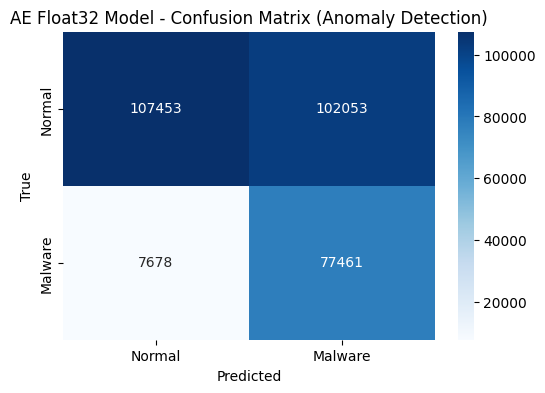

Accuracy: 0.4017546539055474
Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.51      0.66    209506
     Malware       0.43      0.91      0.59     85139

    accuracy                           0.63    294645
   macro avg       0.68      0.71      0.62    294645
weighted avg       0.79      0.63      0.64    294645

Malware Identified: 77461/85139 (90.98%)
Benign Misclassified: 102053/209506 (48.71%)
TP: 77461
TN: 107453
FP: 102053
FN: 7678

--- Resource Usage for AE Float32 Model ---
Storage size: 0.05 MB
Memory used during inference: 0.00 MB
CPU usage change: 57.50%
Inference time: 5.6736 sec


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


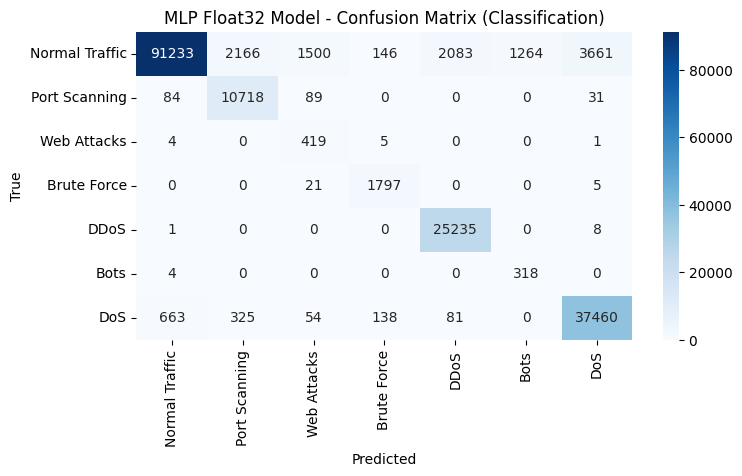

Accuracy: 0.9312922668984035
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.99      0.89      0.94    102053
 Port Scanning       0.81      0.98      0.89     10922
   Web Attacks       0.20      0.98      0.33       429
   Brute Force       0.86      0.99      0.92      1823
          DDoS       0.92      1.00      0.96     25244
          Bots       0.20      0.99      0.33       322
           DoS       0.91      0.97      0.94     38721

      accuracy                           0.93    179514
     macro avg       0.70      0.97      0.76    179514
  weighted avg       0.95      0.93      0.94    179514

Malware Identified: 75947/77461 (98.05%)
Benign Misclassified: 10820/102053 (10.60%)
TP: 75947, TN: 91233, FP: 10820, FN: 1514

--- Resource Usage for MLP Float32 Model ---
Storage size: 0.02 MB
Memory used during inference: 1.04 MB
CPU usage change: -2.00%
Inference time: 1.4521 sec

 --- Evaluating AE: AE Int8 Weights-Only Mo

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)



AE Prediction Class Distribution:
{np.int64(0): np.int64(117812), np.int64(1): np.int64(176833)}


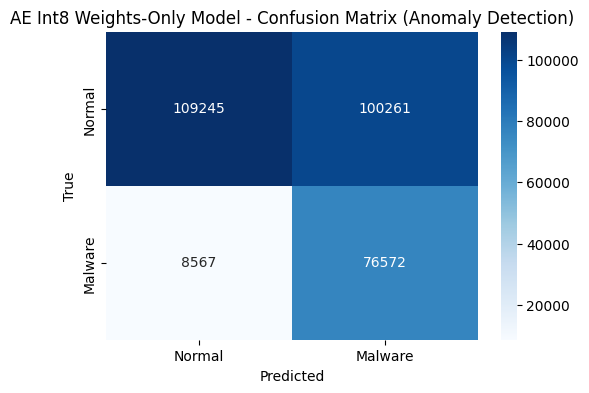

Accuracy: 0.4077856403468581
Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.52      0.67    209506
     Malware       0.43      0.90      0.58     85139

    accuracy                           0.63    294645
   macro avg       0.68      0.71      0.63    294645
weighted avg       0.78      0.63      0.64    294645

Malware Identified: 76572/85139 (89.94%)
Benign Misclassified: 100261/209506 (47.86%)
TP: 76572
TN: 109245
FP: 100261
FN: 8567

--- Resource Usage for AE Int8 Weights-Only Model ---
Storage size: 0.02 MB
Memory used during inference: 116.89 MB
CPU usage change: 69.40%
Inference time: 4.8137 sec


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


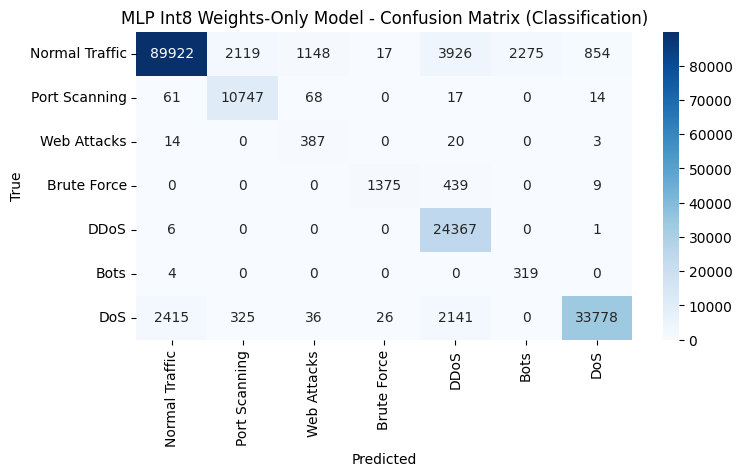

Accuracy: 0.9098697641277363
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.97      0.90      0.93    100261
 Port Scanning       0.81      0.99      0.89     10907
   Web Attacks       0.24      0.91      0.38       424
   Brute Force       0.97      0.75      0.85      1823
          DDoS       0.79      1.00      0.88     24374
          Bots       0.12      0.99      0.22       323
           DoS       0.97      0.87      0.92     38721

      accuracy                           0.91    176833
     macro avg       0.70      0.92      0.72    176833
  weighted avg       0.93      0.91      0.92    176833

Malware Identified: 70973/76572 (92.69%)
Benign Misclassified: 10339/100261 (10.31%)
TP: 70973, TN: 89922, FP: 10339, FN: 5599

--- Resource Usage for MLP Int8 Weights-Only Model ---
Storage size: 0.01 MB
Memory used during inference: 0.09 MB
CPU usage change: -12.40%
Inference time: 1.4485 sec

 --- Evaluating AE: AE Float16 W

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)



AE Prediction Class Distribution:
{np.int64(0): np.int64(115107), np.int64(1): np.int64(179538)}


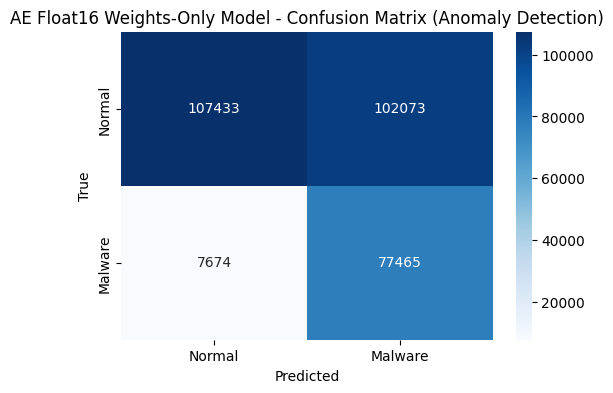

Accuracy: 0.40170035127017256
Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.51      0.66    209506
     Malware       0.43      0.91      0.59     85139

    accuracy                           0.63    294645
   macro avg       0.68      0.71      0.62    294645
weighted avg       0.79      0.63      0.64    294645

Malware Identified: 77465/85139 (90.99%)
Benign Misclassified: 102073/209506 (48.72%)
TP: 77465
TN: 107433
FP: 102073
FN: 7674

--- Resource Usage for AE Float16 Weights-Only Model ---
Storage size: 0.03 MB
Memory used during inference: -76.98 MB
CPU usage change: 50.50%
Inference time: 2.9523 sec


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


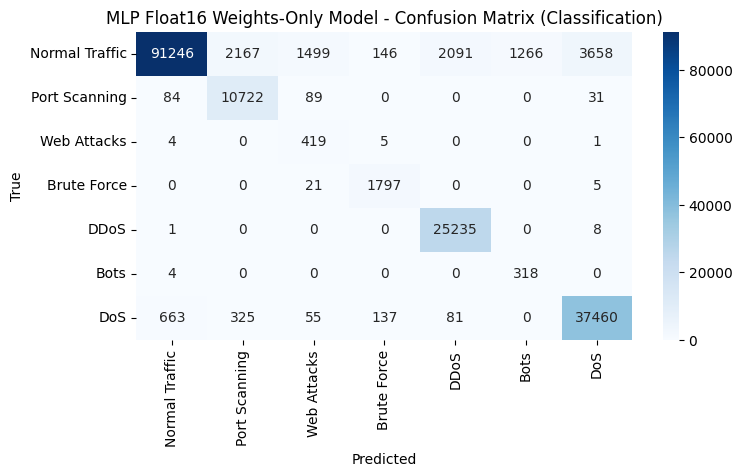

Accuracy: 0.9312624625427486
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.99      0.89      0.94    102073
 Port Scanning       0.81      0.98      0.89     10926
   Web Attacks       0.20      0.98      0.33       429
   Brute Force       0.86      0.99      0.92      1823
          DDoS       0.92      1.00      0.96     25244
          Bots       0.20      0.99      0.33       322
           DoS       0.91      0.97      0.94     38721

      accuracy                           0.93    179538
     macro avg       0.70      0.97      0.76    179538
  weighted avg       0.95      0.93      0.94    179538

Malware Identified: 75951/77465 (98.05%)
Benign Misclassified: 10827/102073 (10.61%)
TP: 75951, TN: 91246, FP: 10827, FN: 1514

--- Resource Usage for MLP Float16 Weights-Only Model ---
Storage size: 0.01 MB
Memory used during inference: 1.18 MB
CPU usage change: 1.40%
Inference time: 2.4364 sec


In [ ]:
# Evaluate the models
for m in tflite_models:
    ae_model_content = m["ae_model"]
    ae_name = m["ae_name"]
    ae_filename = m["ae_filename"]

    mlp_model_content = m["mlp_model"]
    mlp_name = m["mlp_name"]
    mlp_filename = m["mlp_filename"]

    print(f"\n --- Evaluating AE: {ae_name} → MLP: {mlp_name} ---")

    # Construct full file paths
    ae_file_path = os.path.join(os.path.dirname(ae_model_name_prefix), os.path.basename(ae_model_name_prefix) + ae_filename)
    mlp_file_path = os.path.join(os.path.dirname(mlp_model_name_prefix),os.path.basename(mlp_model_name_prefix) + mlp_filename)


    # --- Autoencoder ---

    # Loads the TFLite model and gets it ready to make predictions
    ae_interpreter = tf.lite.Interpreter(model_content=ae_model_content) # Create interpreter object that will read and run the TFLite model
    ae_interpreter.allocate_tensors() # Make the interpreter allocate memory
    ae_input_details = ae_interpreter.get_input_details() # Get expected shape and data type of the data the model needs to evaluate (built-in method)
    ae_output_details = ae_interpreter.get_output_details() #Sshape and data type the model will need to produce the results in

    # Start Resource Measurement
    ae_process = psutil.Process(os.getpid())
    ae_mem_before = ae_process.memory_info().rss / (1024 * 1024)  # MB
    ae_cpu_before = psutil.cpu_percent(interval=None)
    ae_start_time = time.time()

    # Get AE predictions (vectorised computing)
    # Convert X_test to NumPy array if it’s a DataFrame
    X_test_np = X_test.to_numpy() if hasattr(X_test, "to_numpy") else X_test
    X_test_np = X_test_np.astype(np.float32)

    # Quantize inputs if model is int8
    if ae_input_details[0]['dtype'] == np.int8:
        xq = np.round(X_test_np / in_scale + in_zp).astype(np.int8)
    else:
        xq = X_test_np.astype(ae_input_details[0]['dtype'])

    # Feed the entire batch to the interpreter
    ae_interpreter.set_tensor(ae_input_details[0]['index'], xq)
    ae_interpreter.invoke()

    # Get the outputs
    yq = ae_interpreter.get_tensor(ae_output_details[0]['index'])

    # Dequantize outputs if needed
    if ae_output_details[0]['dtype'] == np.int8:
        ae_y_pred_probs = (yq.astype(np.float32) - out_zp) * out_scale
    else:
        ae_y_pred_probs = yq.astype(np.float32)

    # Compute reconstruction error for anomaly detection
    reconstruction_errors = np.abs(ae_y_pred_probs - X_test_np)
    ae_y_pred = (reconstruction_errors > per_feature_thresholds).any(axis=1).astype(int)
    # Print classes and counts in ae_y_pred
    unique_classes, counts = np.unique(ae_y_pred, return_counts=True)
    print("\nAE Prediction Class Distribution:")
    print(dict(zip(unique_classes, counts)))

    malicious_pred_indices = np.flatnonzero(ae_y_pred)# Get indices of samples flagged as malicious

    # End Resouce Measurement
    ae_end_time = time.time()
    ae_mem_after = ae_process.memory_info().rss / (1024 * 1024)
    ae_cpu_after = psutil.cpu_percent(interval=None)


    # Calculate Resource Measurement
    ae_storage_size_mb = os.path.getsize(ae_file_path) / (1024 * 1024) # Use the correct file path
    ae_memory_used_mb = ae_mem_after - ae_mem_before
    ae_cpu_usage_percent = ae_cpu_after - ae_cpu_before
    ae_inference_time_sec = ae_end_time - ae_start_time


    # --- Confusion Matrix ---

    y_test_binary = (y_test != 0).astype(int)# Convert y_test to binary: 0 = Normal, 1 = Malware

    ae_cm = confusion_matrix(y_test_binary, ae_y_pred)
    labels = ["Normal", "Malware"]

    plt.figure(figsize=(6, 4))
    sns.heatmap(ae_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{ae_name} - Confusion Matrix (Anomaly Detection)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # --- Accuracy & Classification Report ---
    print("Accuracy:", accuracy_score(y_test, ae_y_pred))
    print("Classification Report:")
    print(classification_report(y_test_binary, ae_y_pred, target_names=labels, labels=[0, 1]))


    # --- Malware vs Benign Metrics ---
    # Confusion matrix layout (for binary classification):
    # [[TN, FP],
    #  [FN, TP]]
    tn, fp, fn, tp = ae_cm.ravel()

    total_malware = tp + fn
    total_benign = tn + fp

    malware_identified = tp
    benign_misclassified = fp

    percentage_malware_identified = (malware_identified / total_malware * 100) if total_malware > 0 else 0
    percentage_benign_misclassified = (benign_misclassified / total_benign * 100) if total_benign > 0 else 0

    print(f"Malware Identified: {malware_identified}/{total_malware} ({percentage_malware_identified:.2f}%)")
    print(f"Benign Misclassified: {benign_misclassified}/{total_benign} ({percentage_benign_misclassified:.2f}%)")
    print(f"TP: {tp}\nTN: {tn}\nFP: {fp}\nFN: {fn}")

    # Display Resource Usage
    print(f"\n--- Resource Usage for {ae_name} ---")
    print(f"Storage size: {ae_storage_size_mb:.2f} MB")
    print(f"Memory used during inference: {ae_memory_used_mb:.2f} MB")
    print(f"CPU usage change: {ae_cpu_usage_percent:.2f}%")
    print(f"Inference time: {ae_inference_time_sec:.4f} sec")

    # --- MLP ---
    # Loads the TFLite model and gets it ready to make predictions
    mlp_interpreter = tf.lite.Interpreter(model_content=mlp_model_content) # Create interpreter object that will read and run the TFLite model
    mlp_interpreter.allocate_tensors() # Make the interpreter allocate memory
    mlp_input_details = mlp_interpreter.get_input_details() # Get expected shape and data type of the data the model needs to evaluate (built-in method)
    mlp_output_details = mlp_interpreter.get_output_details() #Sshape and data type the model will need to produce the results in

    # Start Resource Measurement
    mlp_process = psutil.Process(os.getpid())
    mlp_mem_before = mlp_process.memory_info().rss / (1024 * 1024)  # MB
    mlp_cpu_before = psutil.cpu_percent(interval=None)
    mlp_start_time = time.time()

    # Get model predictions for test sample
    mlp_y_pred_probs = []

    mlp_X_test = X_test[malicious_pred_indices]
    mlp_y_test = y_test[malicious_pred_indices]

    for i in range(len(mlp_X_test)): # Interpreter object does not have a built-in .evaluate() method like the Keras Model object does, therefore need to go through every sample manually
        # Use iloc to access rows by integer position
        input_data = np.expand_dims(mlp_X_test[i], axis=0).astype(mlp_input_details[0]['dtype'])
        mlp_interpreter.set_tensor(mlp_input_details[0]['index'], input_data) #Feed a single sample of input data into the TFLite interpreter
        mlp_interpreter.invoke() # Tell the interpreter to run the model on the input data
        output_data = mlp_interpreter.get_tensor(mlp_output_details[0]['index']) # Get the output from the model
        mlp_y_pred_probs.append(output_data[0]) # Add the raw output to the list

    mlp_y_pred_probs = np.array(mlp_y_pred_probs)# Convert to NumPy array
    mlp_y_pred = np.argmax(mlp_y_pred_probs, axis=1)  # Get predicted class labels

    # End Resource Measurement
    mlp_end_time = time.time()
    mlp_mem_after = mlp_process.memory_info().rss / (1024 * 1024)
    mlp_cpu_after = psutil.cpu_percent(interval=None)

    # Calculate Resource Measurement
    mlp_storage_size_mb = os.path.getsize(mlp_file_path) / (1024 * 1024) # Use the correct file path
    mlp_memory_used_mb = mlp_mem_after - mlp_mem_before
    mlp_cpu_usage_percent = mlp_cpu_after - mlp_cpu_before
    mlp_inference_time_sec = mlp_end_time - mlp_start_time

    # --- Confusion Matrix ---
    cm = confusion_matrix(mlp_y_test, mlp_y_pred)
    reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}
    labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(cm.shape[0])]

    plt.figure(figsize=(8, 4)) # Create confusion matrix plot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{mlp_name} - Confusion Matrix (Classification)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Print accuracy & classification report
    print("Accuracy:", accuracy_score(mlp_y_test, mlp_y_pred))
    print("Classification Report:")
    print(classification_report(mlp_y_test, mlp_y_pred, target_names=labels))

    # Calculate malware vs benign sample metrics
    normal_label = attack_type_map.get('Normal Traffic', None)
    if normal_label is not None:

        malware_identified = np.sum(np.diag(cm)) - (cm[normal_label, normal_label] if normal_label in mlp_y_test else 0)
        total_malware = np.sum(cm) - (np.sum(cm[normal_label, :]) if normal_label in mlp_y_test else 0)
        percentage_malware_identified = (malware_identified / total_malware * 100) if total_malware > 0 else 0

        benign_misclassified = (np.sum(cm[normal_label, :]) - cm[normal_label, normal_label]) if normal_label in mlp_y_test else 0
        total_benign = np.sum(cm[normal_label, :]) if normal_label in mlp_y_test else 0
        percentage_benign_misclassified = (benign_misclassified / total_benign * 100) if total_benign > 0 else 0

        print(f"Malware Identified: {malware_identified}/{total_malware} ({percentage_malware_identified:.2f}%)")
        print(f"Benign Misclassified: {benign_misclassified}/{total_benign} ({percentage_benign_misclassified:.2f}%)")
        print(f"TP: {malware_identified}, TN: {(cm[normal_label, normal_label] if normal_label in mlp_y_test else 0)}, FP: {benign_misclassified}, FN: {total_malware - malware_identified}")


    # Display Resource Usage
    print(f"\n--- Resource Usage for {mlp_name} ---")
    print(f"Storage size: {mlp_storage_size_mb:.2f} MB")
    print(f"Memory used during inference: {mlp_memory_used_mb:.2f} MB")
    print(f"CPU usage change: {mlp_cpu_usage_percent:.2f}%")
    print(f"Inference time: {mlp_inference_time_sec:.4f} sec")

    # Add a pause to allow CPU to reset
    time.sleep(5) # Pause for 5 seconds

#Full integer 8 Quantisation of the model

In [28]:
# --- Imports ---
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import os

In [29]:
import numpy as np

def ae_representative_dataset_gen():
    # Randomly select 700 indices
    total_samples = len(X_train)
    selected_indices = np.random.choice(total_samples, 1000, replace=False)

    # Yield samples with shape suitable for a fully connected autoencoder: (1, feature_dim)
    for i in selected_indices:
        yield [X_train[i].astype(np.float32).reshape(1, -1)]


In [30]:
import numpy as np

def mlp_representative_dataset_gen():
    # Get class distribution
    class_types, class_counts = np.unique(y_classifier_train, return_counts=True)
    min_samples_per_class = min(class_counts)

    class_indices = [np.where(y_classifier_train == c)[0] for c in class_types]

    # Pick equal number of samples per class (e.g., 100 per class)
    selected_indices = []
    for indices in class_indices:
        selected_indices.extend(np.random.choice(indices, 100, replace=False))

    np.random.shuffle(selected_indices)
    representative_indices = selected_indices

    # Yield samples reshaped for MLP: (1, feature_dim)
    for i in representative_indices:
        yield [X_classifier_train[i].astype(np.float32).reshape(1, -1)]


Autoencoder

In [31]:
# --- AE Full 8 Integer Model Quantization ---
converter = tf.lite.TFLiteConverter.from_keras_model(ae_model)

# Create an int8 quantized model (requires representative dataset)
converter.optimizations = [tf.lite.Optimize.DEFAULT] # Apply default optimizations

#converter.target_spec.supported_types = [tf.int8] # Specify target data type as int8

converter.representative_dataset = ae_representative_dataset_gen # Provide the representative dataset and ensure input dtype is float32
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]# Specify OpsSet must specifically targets the 8-bit integer quantized versions of the TensorFlow Lite built-in operations.

# Set the input and output types to int8 for inference
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
print("# --- AE Full 8 Integer Model Quantization ---")
ae_quantModel_int8 = converter.convert() # Convert the model


# --- AE Perform 16x8 Full Integer Quantization ---
# This converts weights to int8 and activations to int16.
#converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = ae_representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.EXPERIMENTAL_TFLITE_BUILTINS_ACTIVATIONS_INT16_WEIGHTS_INT8]# Specify the experimental ops set for 16x8 quantization - int16 activations and int8 weights.
converter.inference_input_type = tf.int16
converter.inference_output_type = tf.int16

print("# --- AE Perform 16x8 Full Integer Quantization ---")
ae_quant_int16x8_model = converter.convert()# Convert the model


# --- Save models ---
os.makedirs('models', exist_ok=True)
ae_int8_full_path = ae_model_name_prefix + '_int8_full.tflite' # Define path
with open(ae_int8_full_path, 'wb') as f: # Added _full to filename
    f.write(ae_quantModel_int8)
print(f"AE Int8 Full Integer model saved to: {os.path.abspath(ae_int8_full_path)}") # Print path

ae_int16x8_full_path = ae_model_name_prefix + '_int16x8_full.tflite' # Define path
with open(ae_int16x8_full_path, 'wb') as f: # Added _full to filename
    f.write(ae_quant_int16x8_model)
print(f"AE Int16x8 Full Integer model saved to: {os.path.abspath(ae_int16x8_full_path)}") # Print path

# --- AE Full 8 Integer Model Quantization ---
Saved artifact at '/tmp/tmprmm71hbx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 52), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 52), dtype=tf.float32, name=None)
Captures:
  133731792187856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792190352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792190736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792191312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792189776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792186896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792188240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792190928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789669968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789670544: TensorSpec(shape=(), dtype=tf

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


# --- AE Perform 16x8 Full Integer Quantization ---
Saved artifact at '/tmp/tmptdqdijol'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 52), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 52), dtype=tf.float32, name=None)
Captures:
  133731792187856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792190352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792190736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792191312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792189776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792186896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792188240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731792190928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789669968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789670544: TensorSpec(shape=(), dty

MLP

In [35]:
# --- MLP Full 8 Integer Model Quantization ---
converter = tf.lite.TFLiteConverter.from_keras_model(mlp_model) # Changed to mlp_model

# Create an int8 quantized model (requires representative dataset)
converter.optimizations = [tf.lite.Optimize.DEFAULT] # Apply default optimizations

converter.representative_dataset = mlp_representative_dataset_gen # Provide the representative dataset and ensure input dtype is float32
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]# Specify OpsSet must specifically targets the 8-bit integer quantized versions of the TensorFlow Lite built-in operations.

# Set the input and output types to int8 for inference
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
print("# --- MLP Full 8 Integer Model Quantization ---") # Changed to MLP
mlp_quantModel_int8 = converter.convert() # Changed to mlp_quantModel_int8


# --- MLP Perform 16x8 Full Integer Quantization --- # Changed to MLP
# This converts weights to int8 and activations to int16.
#converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model) # This comment might be outdated, leaving as is.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = mlp_representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.EXPERIMENTAL_TFLITE_BUILTINS_ACTIVATIONS_INT16_WEIGHTS_INT8]# Specify the experimental ops set for 16x8 quantization - int16 activations and int8 weights.
converter.inference_input_type = tf.int16
converter.inference_output_type = tf.int16

print("# --- MLP Perform 16x8 Full Integer Quantization ---") # Changed to MLP
mlp_quant_int16x8_model = converter.convert()# Changed to mlp_quant_int16x8_model


# --- Save models ---
os.makedirs('models', exist_ok=True)
mlp_int8_full_path = mlp_model_name_prefix + '_int8_full.tflite' # Changed to mlp_model_name_prefix and mlp_int8_full_path
with open(mlp_int8_full_path, 'wb') as f:
    f.write(mlp_quantModel_int8) # Changed to mlp_quantModel_int8
print(f"MLP Int8 Full Integer model saved to: {os.path.abspath(mlp_int8_full_path)}") # Changed to MLP and mlp_int8_full_path

mlp_int16x8_full_path = mlp_model_name_prefix + '_int16x8_full.tflite' # Changed to mlp_model_name_prefix and mlp_int16x8_full_path
with open(mlp_int16x8_full_path, 'wb') as f:
    f.write(mlp_quant_int16x8_model) # Changed to mlp_quant_int16x8_model
print(f"MLP Int16x8 Full Integer model saved to: {os.path.abspath(mlp_int16x8_full_path)}") # Changed to MLP and mlp_int16x8_full_path

# --- MLP Full 8 Integer Model Quantization ---
Saved artifact at '/tmp/tmpbzm_f1w5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 52), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  133731789680144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789684560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789684176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789682640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789683600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789674192: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


# --- MLP Perform 16x8 Full Integer Quantization ---
Saved artifact at '/tmp/tmpi46c62ud'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 52), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  133731789680144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789684560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789684176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789682640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789683600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133731789674192: TensorSpec(shape=(), dtype=tf.resource, name=None)
MLP Int8 Full Integer model saved to: /content/drive/MyDrive/Colab Notebooks/Honours Project/Sian's Models/AE-MLP files/MLP_int8_full.tflite
MLP Int16x8 Full Integer model saved to: /content/drive/MyDrive/Colab Notebooks/Honours Project/Sian's Models/

Evaluation of full int quant models

In [36]:
# -- Imports ---
import os
import psutil
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf

In [37]:
# List of TFLite models (AE -> MLP)
tflite_models = [
    {
        "ae_model": ae_quantModel_int8,
        "ae_name": "AE Full Int8 Quantized Model",
        "ae_filename": "_int8_full.tflite",
        "mlp_model": mlp_quantModel_int8,
        "mlp_name": "MLP Full Int8 Quantized Model",
        "mlp_filename": "_int8_full.tflite"
    },
    # {
    #     "ae_model": ae_quant_int16x8_model,
    #     "ae_name": "AE Int16x8 Quantized Model",
    #     "ae_filename": "_int16x8_full.tflite",
    #     "mlp_model": mlp_quant_int16x8_model,
    #     "mlp_name": "MLP Int16x8 Quantized Model",
    #     "mlp_filename": "_int16x8_full.tflite"
    # }
]


--- Evaluating AE: AE Full Int8 Quantized Model → MLP: MLP Full Int8 Quantized Model ---
AE Input Details: {'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 52], dtype=int32), 'shape_signature': array([-1, 52], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.003921568859368563, -128), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
AE Output Details: {'name': 'StatefulPartitionedCall_1:0', 'index': 31, 'shape': array([ 1, 52], dtype=int32), 'shape_signature': array([-1, 52], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


New Per-Feature Thresholds: [0.07905001 0.0255467  0.00422355 0.00056324 0.01858977 0.01406985
 0.02273552 0.02196371 0.02140315 0.017072   0.04624051 0.03239213
 0.01200544 0.05600699 0.00928771 0.01589294 0.02033369 0.00455787
 0.0272722  0.01457567 0.01625836 0.02110655 0.01016966 0.02344798
 0.01310882 0.01747148 0.01855132 0.00918633 0.00484218 0.00408431
 0.02028791 0.01275159 0.01215694 0.0199804  0.02501833 0.02286388
 0.00874677 0.00392238 0.00869712 0.01192617 0.02363459 0.00056454
 0.04599794 0.04463568 0.00366818 0.00836795 0.00596966 0.00989203
 0.0051159  0.02028399 0.01907484 0.02325141]


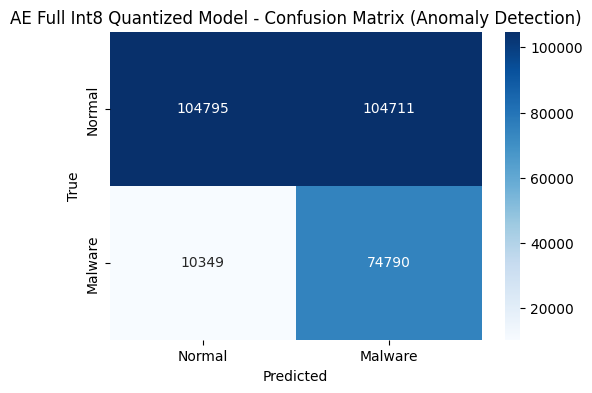

Accuracy: 0.40548456617285206
Classification Report:
              precision    recall  f1-score   support

      Normal       0.91      0.50      0.65    209506
     Malware       0.42      0.88      0.57     85139

    accuracy                           0.61    294645
   macro avg       0.66      0.69      0.61    294645
weighted avg       0.77      0.61      0.62    294645

Malware Identified: 74790/85139 (87.84%)
Benign Misclassified: 104711/209506 (49.98%)
TP: 74790
TN: 104795
FP: 104711
FN: 10349

--- Resource Usage for AE Full Int8 Quantized Model ---
Storage size: 0.02 MB
Memory used during inference: -0.05 MB
CPU usage change: 58.80%
Inference time: 14.8000 sec
MLP Input Details: {'name': 'serving_default_input_layer_1:0', 'index': 0, 'shape': array([ 1, 52], dtype=int32), 'shape_signature': array([-1, 52], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.0066105956211686134, -128), 'quantization_parameters': {'scales': array([0.0066106], dtype=float32), 'zero_p

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


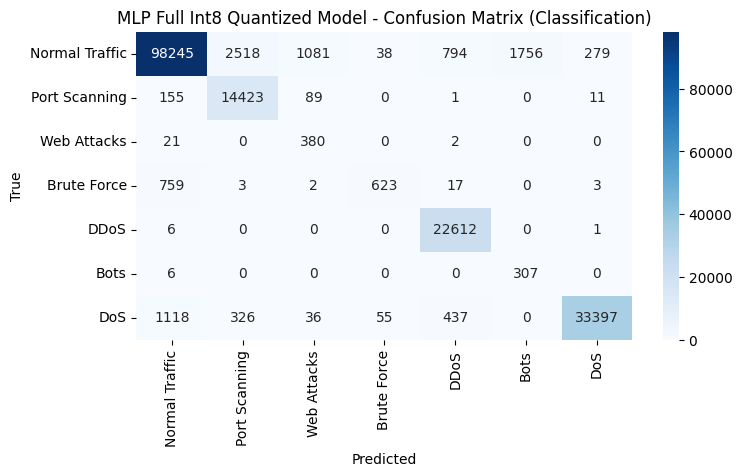

Accuracy: 0.9469975097631768
Classification Report:
                precision    recall  f1-score   support

Normal Traffic       0.98      0.94      0.96    104711
 Port Scanning       0.84      0.98      0.90     14679
   Web Attacks       0.24      0.94      0.38       403
   Brute Force       0.87      0.44      0.59      1407
          DDoS       0.95      1.00      0.97     22619
          Bots       0.15      0.98      0.26       313
           DoS       0.99      0.94      0.97     35369

      accuracy                           0.95    179501
     macro avg       0.72      0.89      0.72    179501
  weighted avg       0.96      0.95      0.95    179501

Malware Identified: 71742/74790 (95.92%)
Benign Misclassified: 6466/104711 (6.18%)
TP: 71742, TN: 98245, FP: 6466, FN: 3048

--- Resource Usage for MLP Full Int8 Quantized Model ---
Storage size: 0.01 MB
Memory used during inference: 0.03 MB
CPU usage change: 31.80%
Inference time: 4.9938 sec


In [62]:
# --- Evaluate all AE → MLP TFLite models ---
for m in tflite_models:
    # --- Unpack model info ---
    ae_model_content = m["ae_model"]
    ae_name = m["ae_name"]
    ae_filename = m["ae_filename"]

    mlp_model_content = m["mlp_model"]
    mlp_name = m["mlp_name"]
    mlp_filename = m["mlp_filename"]

    print(f"\n--- Evaluating AE: {ae_name} → MLP: {mlp_name} ---")

    # --- Construct full file paths ---
    ae_file_path = os.path.join(os.path.dirname(ae_model_name_prefix),os.path.basename(ae_model_name_prefix) + ae_filename)
    mlp_file_path = os.path.join(os.path.dirname(mlp_model_name_prefix),os.path.basename(mlp_model_name_prefix) + mlp_filename)

    # --- Autoencoder ---
    ae_interpreter = tf.lite.Interpreter(model_content=ae_model_content)
    ae_interpreter.allocate_tensors()
    ae_input_details = ae_interpreter.get_input_details()[0]
    ae_output_details = ae_interpreter.get_output_details()[0]

    in_scale,  in_zp  = ae_input_details['quantization']
    out_scale, out_zp = ae_output_details['quantization']
    print(f"AE Input Details: {ae_input_details}")
    print(f"AE Output Details: {ae_output_details}")

    # Start resource tracking
    ae_process = psutil.Process(os.getpid())
    ae_mem_before = ae_process.memory_info().rss / (1024*1024)
    ae_cpu_before = psutil.cpu_percent(interval=None)
    ae_start_time = time.time()

   # --- Make new Thresholds for quantized model ---
    val_reconstructions = []
    # --- Get dequantized reconstruction for normal validation data ---
    for i in range(len(X_val)):
        x = np.expand_dims(X_val[i].astype(np.float32), axis=0)

        # Quantize input if necessary
        if ae_input_details['dtype'] == np.int8:
            xq = np.round(x / in_scale + in_zp).astype(np.int8)
        else:
            xq = x.astype(ae_input_details['dtype'])

        ae_interpreter.set_tensor(ae_input_details['index'], xq)
        ae_interpreter.invoke()
        yq = ae_interpreter.get_tensor(ae_output_details['index'])

        # Dequantize output to FP32
        if ae_output_details['dtype'] == np.int8:
            y = (yq.astype(np.float32) - out_zp) * out_scale
        else:
            y = yq.astype(np.float32)

        val_reconstructions.append(y[0])

    val_reconstructions = np.array(val_reconstructions)

    # --- Calculate per-feature reconstruction errors on normal data ---
    val_reconstruction_errors = np.abs(val_reconstructions - X_val)

    # --- Define the new threshold using a statistical method ---
    mean_feature_errors = np.mean(val_reconstruction_errors, axis=0)
    std_feature_errors = np.std(val_reconstruction_errors, axis=0)
    new_per_feature_thresholds = mean_feature_errors + std_feature_errors #3 * std_feature_errors

    print(f"New Per-Feature Thresholds: {new_per_feature_thresholds}")

    # AE predictions (loop per sample)
    # --- AE Test Predictions ---
    ae_y_pred_probs = []
    for i in range(len(X_test)):
        x = np.expand_dims(X_test[i].astype(np.float32), axis=0)  # Correct: shape [1, num_features]
        if ae_input_details['dtype'] == np.int8:
            xq = np.round(x / in_scale + in_zp).astype(np.int8)
        else:
            xq = x.astype(ae_input_details['dtype'])

        ae_interpreter.set_tensor(ae_input_details['index'], xq)
        ae_interpreter.invoke()
        yq = ae_interpreter.get_tensor(ae_output_details['index'])

        if ae_output_details['dtype'] == np.int8:
            y = (yq.astype(np.float32) - out_zp) * out_scale
        else:
            y = yq.astype(np.float32)

        ae_y_pred_probs.append(y[0])

    ae_y_pred_probs = np.array(ae_y_pred_probs)

    # --- Anomaly Detection ---
    test_reconstruction_errors = np.abs(ae_y_pred_probs - X_test)
    #print(per_feature_thresholds)

    # ae_y_pred = (test_reconstruction_errors > (per_feature_thresholds)).any(axis=1).astype(int)
    ae_y_pred = (test_reconstruction_errors > (new_per_feature_thresholds)).any(axis=1).astype(int)
    malicious_pred_indices = np.flatnonzero(ae_y_pred)

    # End resource tracking
    ae_end_time = time.time()
    ae_mem_after = ae_process.memory_info().rss / (1024*1024)
    ae_cpu_after = psutil.cpu_percent(interval=None)

    # Calculate resource usage
    ae_storage_size_mb = os.path.getsize(ae_file_path) / (1024*1024)
    ae_memory_used_mb = ae_mem_after - ae_mem_before
    ae_cpu_usage_percent = ae_cpu_after - ae_cpu_before
    ae_inference_time_sec = ae_end_time - ae_start_time

    # --- Confusion Matrix ---

    y_test_binary = (y_test != 0).astype(int)# Convert y_test to binary: 0 = Normal, 1 = Malware

    ae_cm = confusion_matrix(y_test_binary, ae_y_pred)
    labels = ["Normal", "Malware"]

    plt.figure(figsize=(6, 4))
    sns.heatmap(ae_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{ae_name} - Confusion Matrix (Anomaly Detection)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # --- Accuracy & Classification Report ---
    print("Accuracy:", accuracy_score(y_test, ae_y_pred))
    print("Classification Report:")
    print(classification_report(y_test_binary, ae_y_pred, target_names=labels, labels=[0, 1]))


    # --- Malware vs Benign Metrics ---
    # Confusion matrix layout (for binary classification):
    # [[TN, FP],
    #  [FN, TP]]
    tn, fp, fn, tp = ae_cm.ravel()

    total_malware = tp + fn
    total_benign = tn + fp

    malware_identified = tp
    benign_misclassified = fp

    percentage_malware_identified = (malware_identified / total_malware * 100) if total_malware > 0 else 0
    percentage_benign_misclassified = (benign_misclassified / total_benign * 100) if total_benign > 0 else 0

    print(f"Malware Identified: {malware_identified}/{total_malware} ({percentage_malware_identified:.2f}%)")
    print(f"Benign Misclassified: {benign_misclassified}/{total_benign} ({percentage_benign_misclassified:.2f}%)")
    print(f"TP: {tp}\nTN: {tn}\nFP: {fp}\nFN: {fn}")

    # Display Resource Usage
    print(f"\n--- Resource Usage for {ae_name} ---")
    print(f"Storage size: {ae_storage_size_mb:.2f} MB")
    print(f"Memory used during inference: {ae_memory_used_mb:.2f} MB")
    print(f"CPU usage change: {ae_cpu_usage_percent:.2f}%")
    print(f"Inference time: {ae_inference_time_sec:.4f} sec")





    # --- MLP --- #
    # Loads the TFLite model and gets it ready to make predictions
    mlp_interpreter = tf.lite.Interpreter(model_content=mlp_model_content) # Create interpreter object that will read and run the TFLite model
    mlp_interpreter.allocate_tensors() # Make the interpreter allocate memory
    mlp_input_details = mlp_interpreter.get_input_details()[0] # Get expected shape and data type of the data the model needs to evaluate (built-in method)
    mlp_output_details = mlp_interpreter.get_output_details()[0] #Sshape and data type the model will need to produce the results in

    mlp_in_scale, mlp_in_zp = mlp_input_details['quantization']
    mlp_out_scale, mlp_out_zp = mlp_output_details['quantization']
    print(f"MLP Input Details: {mlp_input_details}")
    print(f"MLP Output Details: {mlp_output_details}")

    # Start Resource Measurement
    mlp_process = psutil.Process(os.getpid())
    mlp_mem_before = mlp_process.memory_info().rss / (1024 * 1024)  # MB
    mlp_cpu_before = psutil.cpu_percent(interval=None)
    mlp_start_time = time.time()

    # --- MLP Predictions ---
    mlp_y_pred_probs = []
    mlp_X_test = X_test[malicious_pred_indices]
    mlp_y_test = y_test[malicious_pred_indices]

    for i in range(len(mlp_X_test)):
        x = np.expand_dims(mlp_X_test[i].astype(np.float32), axis=0)  # shape [1, num_features]
        if mlp_input_details['dtype'] == np.int8:
            xq = np.round(x / mlp_in_scale + mlp_in_zp).astype(np.int8)
        else:
            xq = x.astype(mlp_input_details['dtype'])

        mlp_interpreter.set_tensor(mlp_input_details['index'], xq)
        mlp_interpreter.invoke()
        yq = mlp_interpreter.get_tensor(mlp_output_details['index'])

        if mlp_output_details['dtype'] == np.int8:
            y = (yq.astype(np.float32) - mlp_out_zp) * mlp_out_scale
        else:
            y = yq.astype(np.float32)

        mlp_y_pred_probs.append(y[0])

    mlp_y_pred_probs = np.array(mlp_y_pred_probs)
    mlp_y_pred = np.argmax(mlp_y_pred_probs, axis=1)

    # End Resource Measurement
    mlp_end_time = time.time()
    mlp_mem_after = mlp_process.memory_info().rss / (1024 * 1024)
    mlp_cpu_after = psutil.cpu_percent(interval=None)

    # Calculate Resource Measurement
    mlp_storage_size_mb = os.path.getsize(mlp_file_path) / (1024 * 1024) # Use the correct file path
    mlp_memory_used_mb = mlp_mem_after - mlp_mem_before
    mlp_cpu_usage_percent = mlp_cpu_after - mlp_cpu_before
    mlp_inference_time_sec = mlp_end_time - mlp_start_time

    # --- Confusion Matrix ---
    cm = confusion_matrix(mlp_y_test, mlp_y_pred)
    reverse_attack_type_map = {v: k for k, v in attack_type_map.items()}
    labels = [reverse_attack_type_map.get(i, f'Unknown {i}') for i in range(cm.shape[0])]

    plt.figure(figsize=(8, 4)) # Create confusion matrix plot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"{mlp_name} - Confusion Matrix (Classification)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Print accuracy & classification report
    print("Accuracy:", accuracy_score(mlp_y_test, mlp_y_pred))
    print("Classification Report:")
    print(classification_report(mlp_y_test, mlp_y_pred, target_names=labels))

    # Calculate malware vs benign sample metrics
    normal_label = attack_type_map.get('Normal Traffic', None)
    if normal_label is not None:

        malware_identified = np.sum(np.diag(cm)) - (cm[normal_label, normal_label] if normal_label in mlp_y_test else 0)
        total_malware = np.sum(cm) - (np.sum(cm[normal_label, :]) if normal_label in mlp_y_test else 0)
        percentage_malware_identified = (malware_identified / total_malware * 100) if total_malware > 0 else 0

        benign_misclassified = (np.sum(cm[normal_label, :]) - cm[normal_label, normal_label]) if normal_label in mlp_y_test else 0
        total_benign = np.sum(cm[normal_label, :]) if normal_label in mlp_y_test else 0
        percentage_benign_misclassified = (benign_misclassified / total_benign * 100) if total_benign > 0 else 0

        print(f"Malware Identified: {malware_identified}/{total_malware} ({percentage_malware_identified:.2f}%)")
        print(f"Benign Misclassified: {benign_misclassified}/{total_benign} ({percentage_benign_misclassified:.2f}%)")
        print(f"TP: {malware_identified}, TN: {(cm[normal_label, normal_label] if normal_label in mlp_y_test else 0)}, FP: {benign_misclassified}, FN: {total_malware - malware_identified}")


    # Display Resource Usage
    print(f"\n--- Resource Usage for {mlp_name} ---")
    print(f"Storage size: {mlp_storage_size_mb:.2f} MB")
    print(f"Memory used during inference: {mlp_memory_used_mb:.2f} MB")
    print(f"CPU usage change: {mlp_cpu_usage_percent:.2f}%")
    print(f"Inference time: {mlp_inference_time_sec:.4f} sec")

    # Add a pause to allow CPU to reset
    time.sleep(5) # Pause for 5 seconds